## **PROJECT TITLE : SPOTTING FAKE JOBS** ##

![Fake_job](Images/Fake_Job.png)

# **BUSINESS UNDERSTANDING**

## **PROJECT OVERVIEW**

Although fraudulent job postings account for only a small fraction of online listings, their consequences for job seekers are disproportionately severe, ranging from financial loss to identity theft. The class imbalance in this dataset mirrors real-world challenges such as fraud detection and medical diagnosis, where rare events carry critical importance. This project aims to develop and evaluate machine learning models capable of detecting these fraudulent postings, applying advanced techniques such as SMOTE and class weighting to address the imbalance. By prioritizing recall and F1-score over simple accuracy, the project ensures reliable detection of fraudulent postings, ultimately enhancing safety and trust in online recruitment platforms.

## **PROBLEM STATEMENT** 

While the majority of online job postings are legitimate, fraudulent postings, though rare, pose a significant risk to job seekers. Victims of fake job ads can face financial loss, identity theft, and wasted time, leading to a decline in trust in online recruitment platforms. Because fake postings make up only a small fraction of the total, the challenge lies in building a machine learning model that can effectively detect these rare but harmful cases.

## **OBJECTIVES**
1. To identify potential indicators of fradulent jobs.

2. To identify a job as fradulent or legitimate.

3. To generate actionable insights for job seekers and platforms to detect and prevent fradulent posting.


# **1. DATA LOADING AND EXPLORATION**

This is the first step where the data is loaded ,the data is explored to understand what can be achieved using the dataset.

In [46]:
# Importing necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
# Loading the dataset
fake_job_postings = pd.read_csv('Data/fake_job_postings.csv')
fake_job_postings.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
# checking the shape of the dataset
fake_job_postings.shape


(17880, 18)

In [4]:
# Checking the info of the dataset
fake_job_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
# Summary statistics of the dataset
fake_job_postings.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Checkig for missing values
fake_job_postings.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

There are missing values.

In [7]:
# Checking for duplicates
fake_job_postings.duplicated().sum()

0

There are no duplicates.

# **2. DATA CLEANING**

In this second step the data is cleaned this means handling missing values since ther are no duplicates , this is done in order to be able to proceed with analysis.

In [8]:
# Filling tex-based columns with "Not Provided"
text_cols = ["company_profile","description", "requirements", "benefits"]

fake_job_postings[text_cols] = fake_job_postings[text_cols].fillna("Not Provided")

In [9]:
# Filling categorical columns with "Unknown"
categorical_cols =[
    "location","department","employment_type","required_experience","required_education","industry","function"
]

fake_job_postings[categorical_cols] = fake_job_postings[categorical_cols].fillna("Unknown")

In [10]:
# Saving the cleaned dataset
fake_job_postings.to_csv('Data/cleaned_fake_job_postings.csv')

In [11]:
# Replace with your actual file path
cleaned_fake_job_postings = pd.read_csv("Data/cleaned_fake_job_postings.csv")

# Make a working copy
fake_job_postings = cleaned_fake_job_postings.copy()

df = fake_job_postings.copy()


# **3. EXPLORATORY DATA ANALYSIS (EDA)**

EDA is about asking questions of your data and visualizing answers, so you can build intuition before modeling.

## **🔹 1. Univariate Analysis (One Variable at a Time)**

📌 Goal: Look at the distribution and frequency of each feature.

Possible Checks:

Target Variable

Distribution of fraudulent jobs (class balance) → Bar Chart / Pie Chart.

Categorical Variables

employment_type, required_experience, required_education, industry, function, location → Bar Charts to see most common values.

Numerical Variables

telecommuting, has_company_logo, has_questions → Bar Charts (since they are binary).

Text Features

Job description/requirements length (histogram).

Word clouds of most frequent words in description or requirements.

In [12]:
# Set style
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)

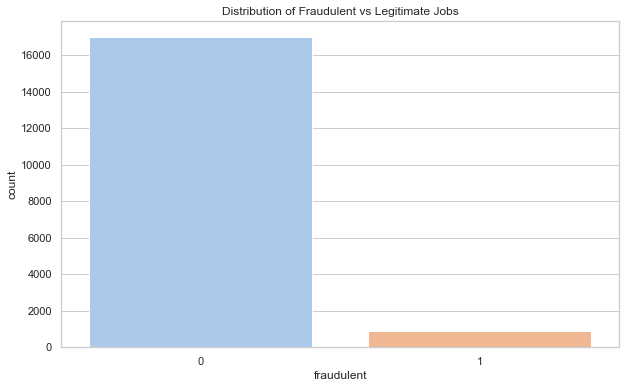

In [13]:
# Target variable distribution
sns.countplot(x="fraudulent", data=df)
plt.title("Distribution of Fraudulent vs Legitimate Jobs")
plt.show()

The above plot shows that:
Majority of the dataset (over 16,000 postings) are legitimate jobs(0).

Only a small fraction (a little above 1,000 postings) are fradulent jobs(1).

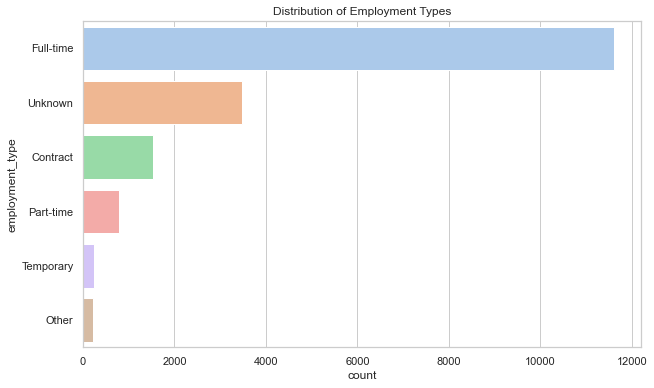

In [14]:
# Emloyment type distribution
sns.countplot(y="employment_type",data=df, order=df["employment_type"].value_counts().index)
plt.title("Distribution of Employment Types")
plt.show()

The chart suggests that full-time employment is the dominant type, while temporary and other types are the least represented.

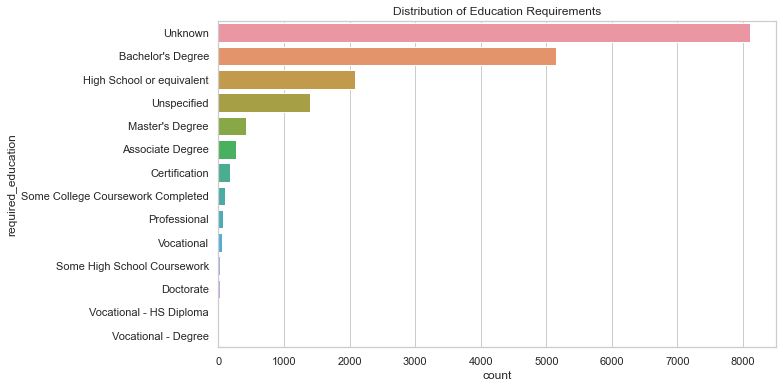

In [15]:
# Required education distribution
sns.countplot(y="required_education", data=df, order=df["required_education"].value_counts().index)
plt.title("Distribution of Education Requirements")
plt.show()


The chart indicates that the majority of education requirements fall under "Unknown" and "Bachelor's Degree," while advanced degrees like Doctorate and vocational combinations are the least required.

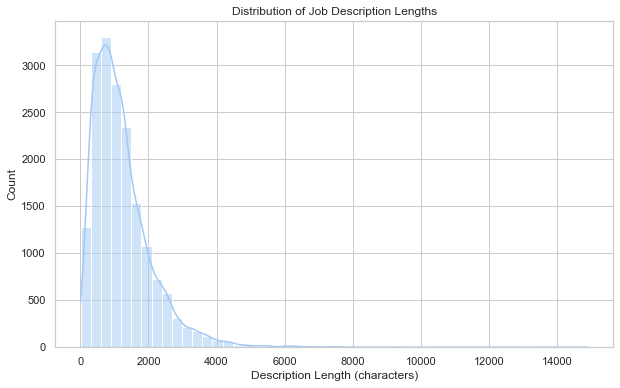

In [16]:
# Length of job descripltions
df["desc_length"] = df["description"].str.len()
sns.histplot(df["desc_length"], bins=50, kde=True)
plt.title("Distribution of Job Description Lengths")
plt.xlabel("Description Length (characters)")
plt.show()

This suggests that most job descriptions are relatively short, typically under 1,000 characters, with a long tail of fewer descriptions that are much longer.

**🔹 2. Bivariate Analysis (Two Variables Together)**

📌 Goal: Explore relationships between features and the target (fraudulent).

Possible Checks:

Categorical vs Target

Fraud rate across employment_type (stacked bar).

Fraud rate across required_experience, industry, function.

Numerical vs Target

Average description/requirements length vs fraudulent (Boxplot).

Categorical vs Categorical

Cross-tab between employment_type and required_experience.

Binary Features vs Target

Fraud rate when has_company_logo = 0 vs 1.

Fraud rate when telecommuting = 0 vs 1.

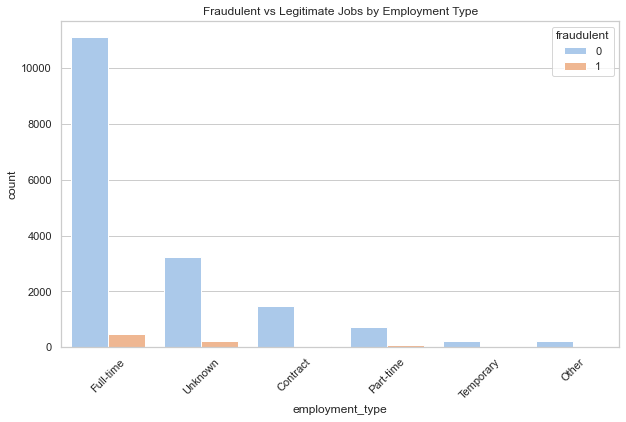

In [17]:
# Fraud vs employment type
sns.countplot(x="employment_type", hue="fraudulent", data=df,
              order=df["employment_type"].value_counts().index)
plt.title("Fraudulent vs Legitimate Jobs by Employment Type")
plt.xticks(rotation=45)
plt.show()

The chart indicates that the majority of jobs across all employment types are legitimate, with full-time jobs having the highest overall count. Fraudulent jobs are significantly less common, with the highest fraudulent count appearing in full-time and unknown categories, though still a small fraction compared to legitimate jobs.

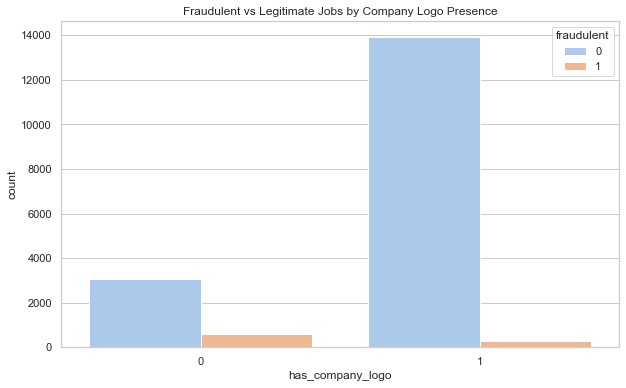

In [18]:
# Faud vs has_company_logo
sns.countplot(x="has_company_logo", hue="fraudulent", data=df)
plt.title("Fraudulent vs Legitimate Jobs by Company Logo Presence")
plt.show()

The chart shows that the vast majority of jobs with a company logo are legitimate, while jobs without a logo have a higher proportion of fraudulent listings, though legitimate jobs still outnumber fraudulent ones in this category.

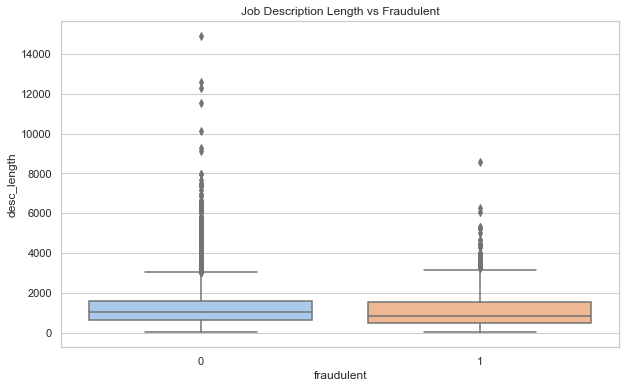

In [19]:
# Fraud vs job description length
sns.boxplot(x="fraudulent", y="desc_length", data=df)
plt.title("Job Description Length vs Fraudulent")
plt.show()


The plot suggests that the distribution of job description lengths is quite similar for both legitimate and fraudulent jobs, with medians and IQRs closely aligned. Both categories have a wide range of lengths, with some outliers extending to higher values, indicating that description length alone may not be a strong indicator of fraudulence.

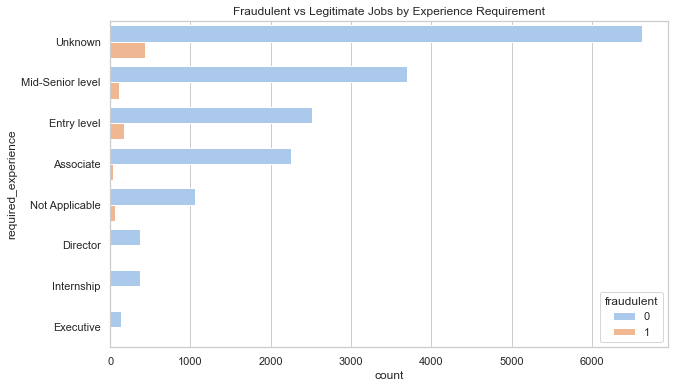

In [20]:
# Fraud vs required_experience
sns.countplot(y="required_experience", hue="fraudulent", data=df,
              order=df["required_experience"].value_counts().index)
plt.title("Fraudulent vs Legitimate Jobs by Experience Requirement")
plt.show()

The chart indicates that the majority of jobs across all experience levels are legitimate, with the "Unknown" category having the highest overall count. Fraudulent jobs are significantly less common, with the highest fraudulent count in the "Unknown" category, though still a small fraction compared to legitimate jobs.

**🔹 3. Multivariate Analysis (Three+ Variables)**

📌 Goal: Understand more complex interactions.

Possible Checks:

Correlation Heatmap

Check correlations among binary/numeric features (fraudulent, telecommuting, has_company_logo, has_questions).

Pairplot

Visualize relationships between fraudulent, description length, requirements length, and benefits length.

Grouped Analysis

Fraud rate by (industry + employment_type).

Fraud rate by (required_experience + required_education).

Text + Category

Compare most common words in fraudulent vs legitimate job postings.

Multivariate Plots

Parallel coordinates plot of numeric features across fraudulent vs non-fraudulent jobs.

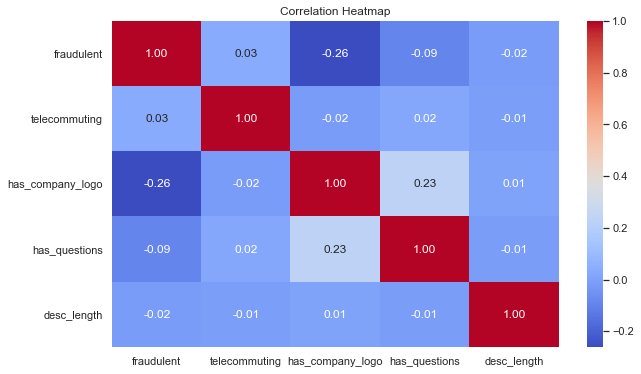

In [21]:
# Correlation heatmap for numeric features
numeric_cols = ["fraudulent", "telecommuting", "has_company_logo", "has_questions", "desc_length"]
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The heatmap suggests that the presence of a company logo has a weak negative correlation with fraudulence, while other features like telecommuting, presence of questions, and description length show very weak or negligible correlations with fraudulence.

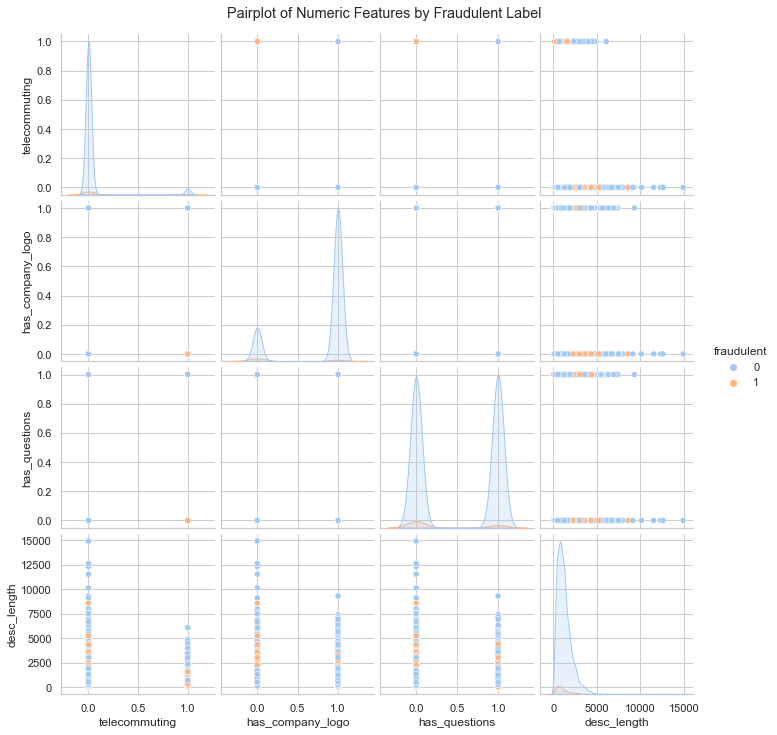

In [22]:
# Pairplot of selected features
sns.pairplot(df[numeric_cols], hue="fraudulent", diag_kind="kde")
plt.suptitle("Pairplot of Numeric Features by Fraudulent Label", y=1.02)
plt.show()

 Legitimate jobs (blue) significantly outnumber fraudulent jobs (orange) across most features. Fraudulent jobs are slightly more associated with the absence of a company logo (has_company_logo = 0) and no questions (has_questions = 0). Description length varies widely but shows no notable difference between fraudulent and legitimate jobs. Telecommuting has a minor increase in fraudulent jobs, though the effect is small.

while conduction EDA I noticed the there is a class imbalance therefor;

Techniques like resampling (oversample fraudulent jobs, undersample legitimate ones) Or using algorithms that handle imbalance (like XGBoost, Random Forest with class weights) Or applying SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset.

# **4. CLASS IMBALANCE**

Class imbalnceis when the target class (labels) in the dataset are not reperesented equally:

95% Legitimate (class 0)

5% Fradulent   (class 1)

In [24]:
# Check for class imbalance
df["fraudulent"].value_counts(normalize=True)

0    0.951566
1    0.048434
Name: fraudulent, dtype: float64

In [44]:
# Features and Target variable
X = df.drop('fraudulent', axis=1)   # Features
y = df['fraudulent']                # Target

# Encode categorical features (like "title", "location")
for col in X.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [45]:
# Applying SMOTE on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: 0    13611
1      693
Name: fraudulent, dtype: int64
After SMOTE: 1    13611
0    13611
Name: fraudulent, dtype: int64


📊 Before SMOTE

0 → Legitimate jobs (majority class) = 13,611 samples

1 → Fraudulent jobs (minority class) = 693 samples

👉 This shows class imbalance: legitimate jobs far outweigh fraudulent ones.

📊 After SMOTE

1 (fraudulent jobs) has been upsampled to match 0

Both classes now have 13,611 samples each

👉 SMOTE created synthetic fraudulent job postings (not duplicates, but new, slightly varied data points) until the dataset was balanced.

In [50]:
# Training models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced"),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", scale_pos_weight= (y_train==0).sum()/(y_train==1).sum())
}
